In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read VGG16 results data
results_path = "./../results/vgg16/results.csv"
results_df = pd.read_csv(results_path, sep = ";")

In [3]:
results_df.shape

(54, 30)

In [4]:
results_df.head()

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,training_time,train_loss_last_epoch,train_loss_avg5,train_loss_avg10,...,test_sparse_categorical_accuracy,true_3_pred_3,true_3_pred_5,true_3_pred_7,true_5_pred_3,true_5_pred_5,true_5_pred_7,true_7_pred_3,true_7_pred_5,true_7_pred_7
0,v1,90,64,32,16,16,97.293156,0.038325,0.042282,0.046802,...,0.992593,90,0,0,0,90,0,0,2,88
1,v1,90,64,32,256,256,102.302117,0.004976,0.005383,0.005956,...,0.992593,90,0,0,0,90,0,0,2,88
2,v1,90,64,32,4096,4096,133.971879,0.000311,0.000368,0.000451,...,0.992593,90,0,0,0,90,0,0,2,88
3,v1,90,128,32,16,16,372.864259,0.010527,0.011262,0.012402,...,1.000000,90,0,0,0,90,0,0,0,90
4,v1,90,128,32,256,256,386.086895,0.000350,0.000376,0.000404,...,0.996296,90,0,0,0,90,0,0,1,89


---

### Initial analysis

In [5]:
# Base statistics - table
results_df.iloc[:, 6:].describe()

,training_time,train_loss_last_epoch,train_loss_avg5,train_loss_avg10,train_sparse_categorical_accuracy_last_epoch,train_sparse_categorical_accuracy_avg5,train_sparse_categorical_accuracy_avg10,val_loss_last_epoch,val_loss_avg5,val_loss_avg10,...,test_sparse_categorical_accuracy,true_3_pred_3,true_3_pred_5,true_3_pred_7,true_5_pred_3,true_5_pred_5,true_5_pred_7,true_7_pred_3,true_7_pred_5,true_7_pred_7
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000
mean,3046.498088,0.069106,0.069795,0.070601,0.963872,0.963803,0.963777,0.073980,0.074805,0.075718,...,0.960768,86.555556,0.092593,3.351852,0.055556,84.870370,5.074074,0.0,2.018519,87.981481
std,4405.262634,0.230545,0.230926,0.231389,0.137193,0.137175,0.137210,0.237313,0.237937,0.238574,...,0.139324,17.139458,0.401343,17.153202,0.408248,20.782836,20.792644,0.0,12.215812,12.215812
min,97.016058,0.000000,0.000000,0.000000,0.341667,0.341667,0.341667,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,386.236710,0.000001,0.000001,0.000002,1.000000,1.000000,1.000000,0.000016,0.000017,0.000018,...,0.996296,90.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.0,0.000000,89.000000
50%,1239.854445,0.000049,0.000058,0.000070,1.000000,1.000000,1.000000,0.000235,0.000272,0.000288,...,1.000000,90.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.0,0.000000,90.000000
75%,3880.498335,0.000869,0.001000,0.001349,1.000000,1.000000,1.000000,0.002152,0.001901,0.002107,...,1.000000,90.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.0,1.000000,90.000000
max,15994.862591,1.098569,1.098597,1.098586,1.000000,1.000000,1.000000,1.100174,1.100246,1.100235,...,1.000000,90.000000,2.000000,90.000000,3.000000,90.000000,90.000000,0.0,90.000000,90.000000


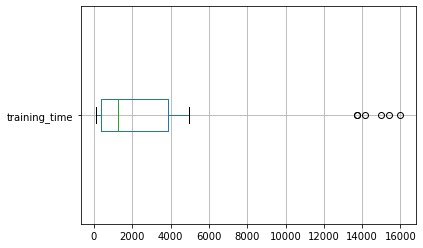

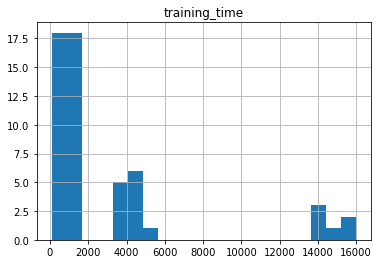

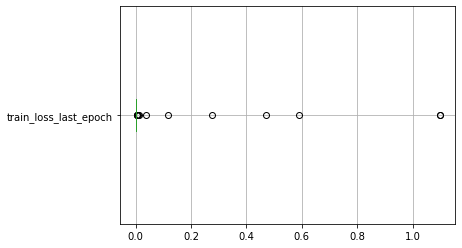

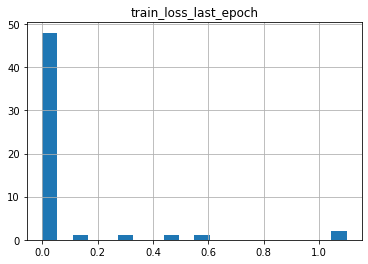

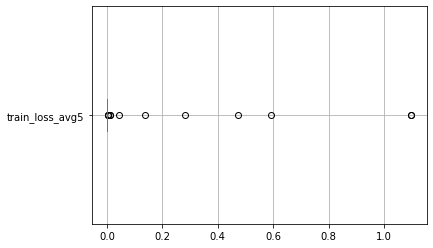

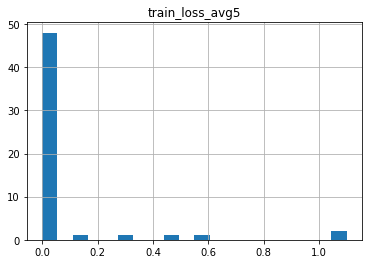

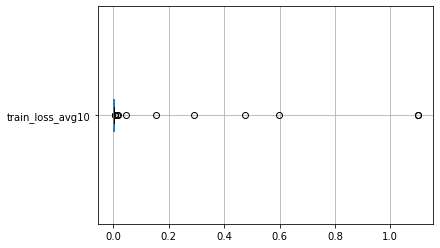

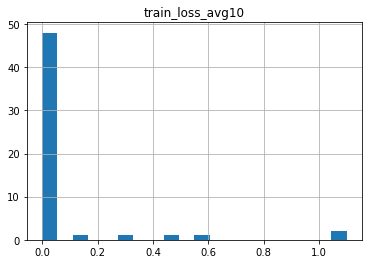

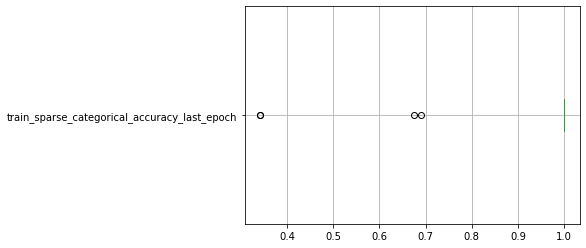

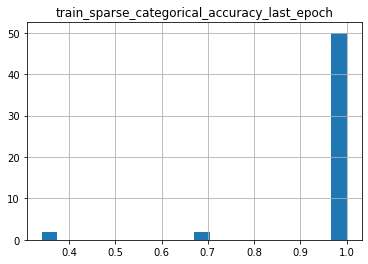

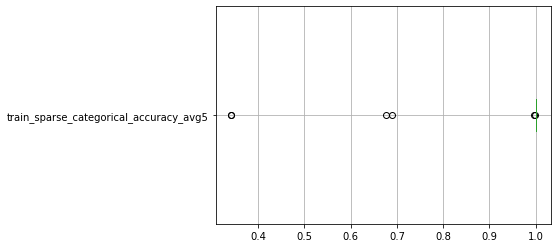

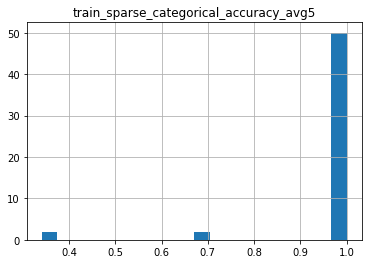

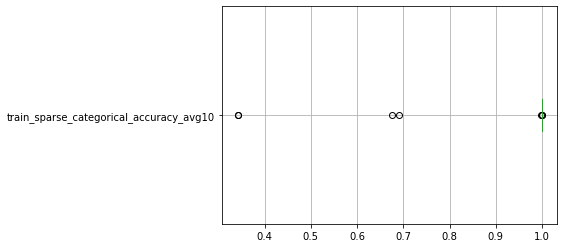

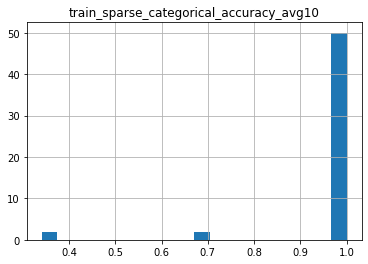

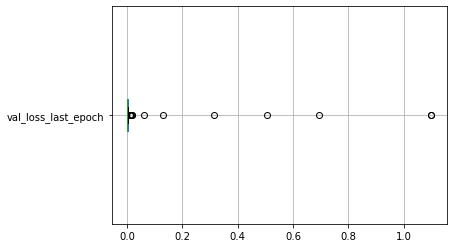

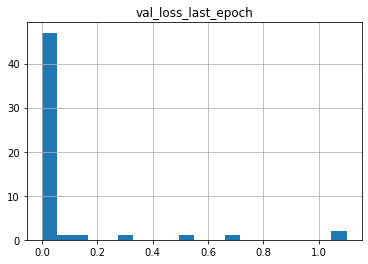

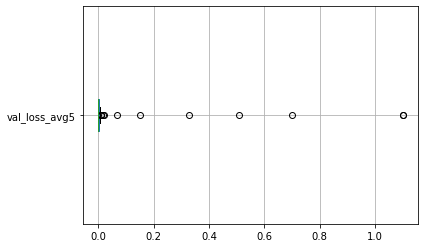

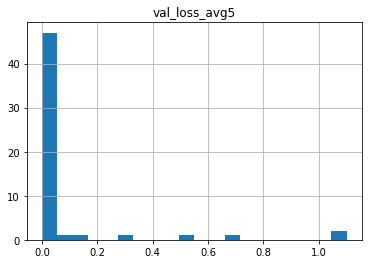

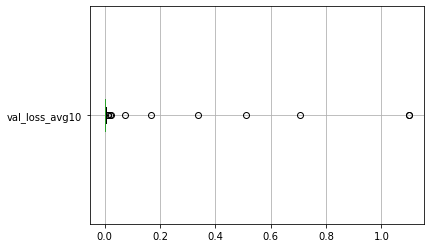

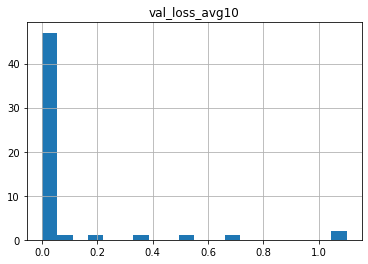

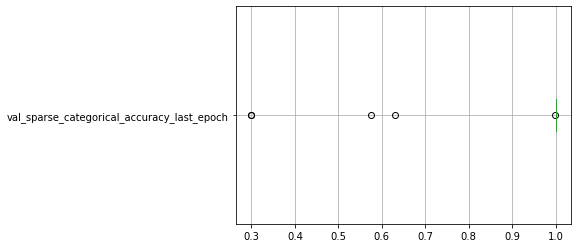

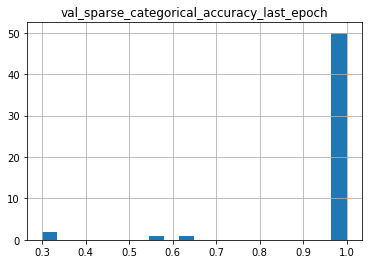

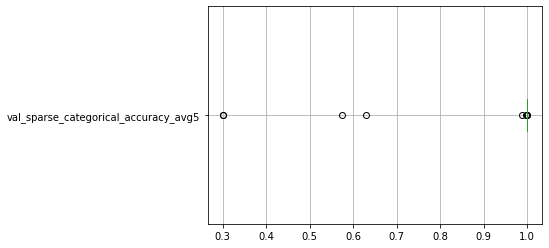

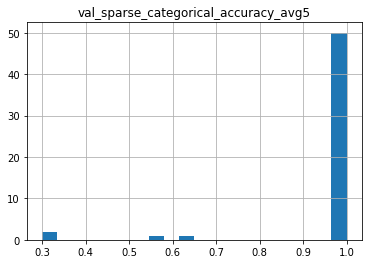

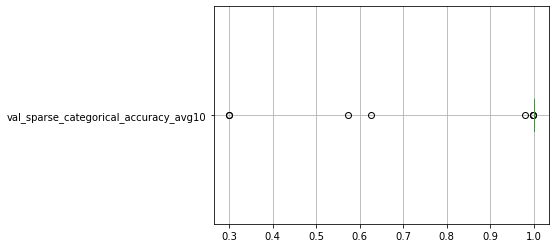

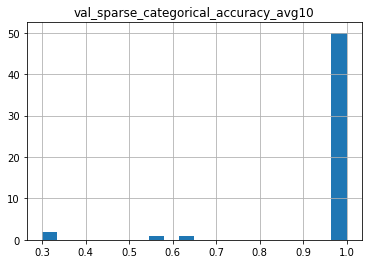

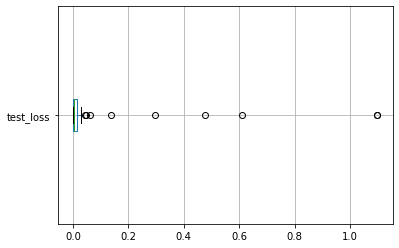

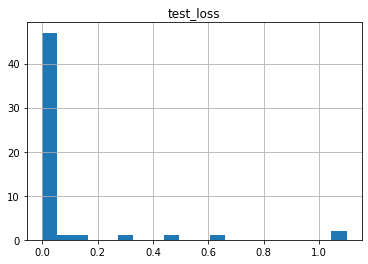

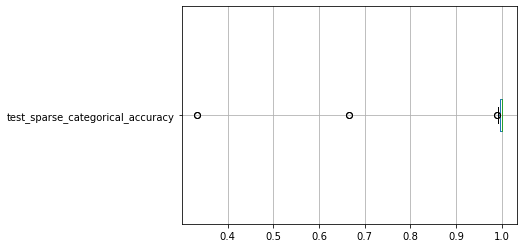

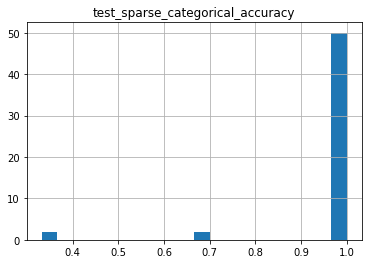

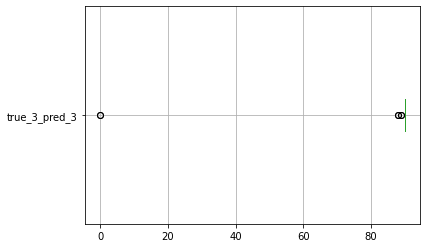

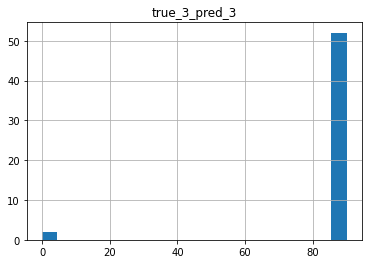

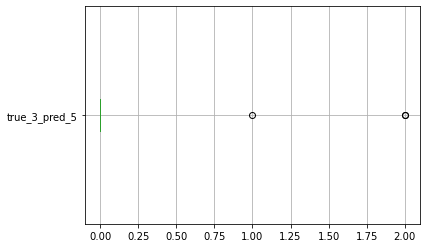

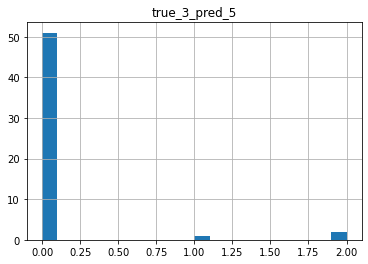

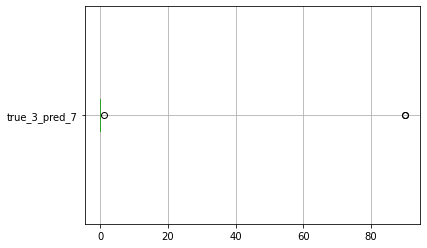

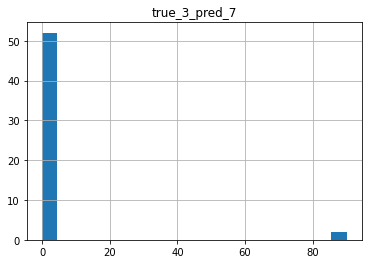

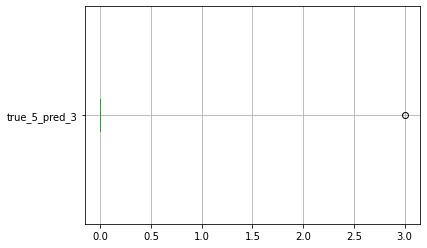

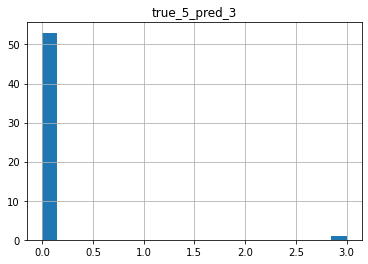

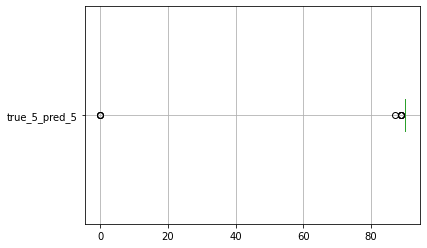

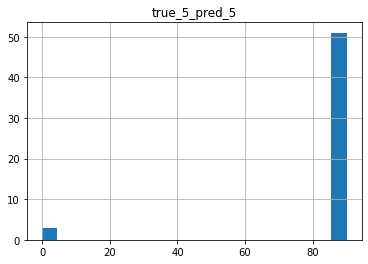

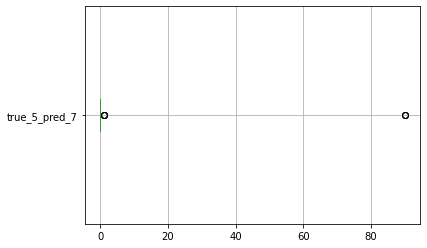

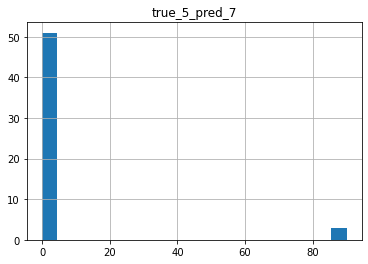

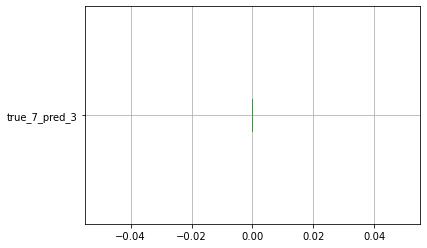

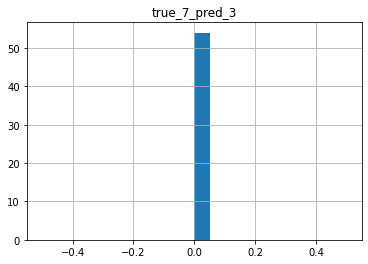

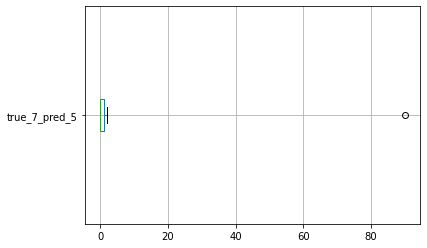

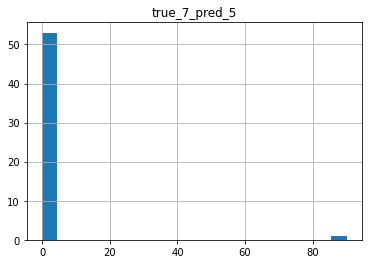

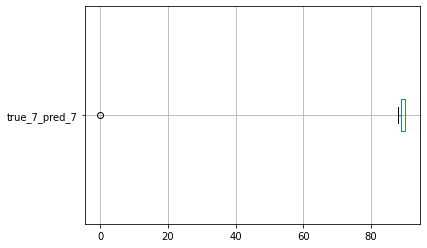

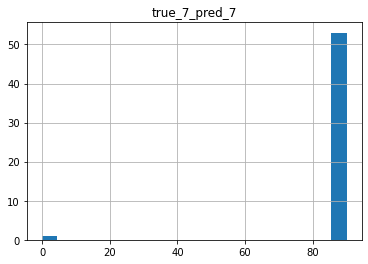

In [6]:
# Base statistics - boxplots, histograms
for col in list(results_df.columns[6:]):
  results_df[[col]].boxplot(vert = False)
  plt.show()
  results_df[[col]].hist(bins = 20)
  plt.show()

In [7]:
# All training time
all_training_time = results_df[["training_time"]].sum()[0]/3600
print("All training time took about", "{0:02.0f}h {1:02.0f}min".format(*divmod(all_training_time * 60, 60)), ".")

All training time took about 45h 42min .


---

### Accuracy analysis

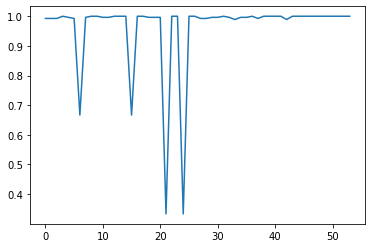

In [8]:
plt.plot(results_df["test_sparse_categorical_accuracy"])
plt.show()

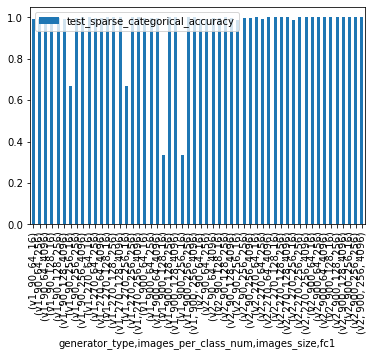

In [9]:
results_df.groupby(by = ["generator_type", "images_per_class_num", "images_size", "fc1"]).max(["test_sparse_categorical_accuracy"])[["test_sparse_categorical_accuracy"]].plot.bar()
plt.show()

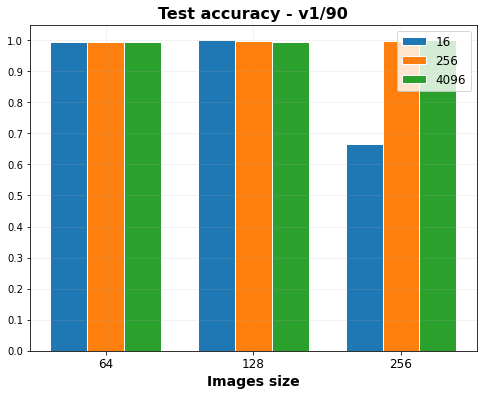

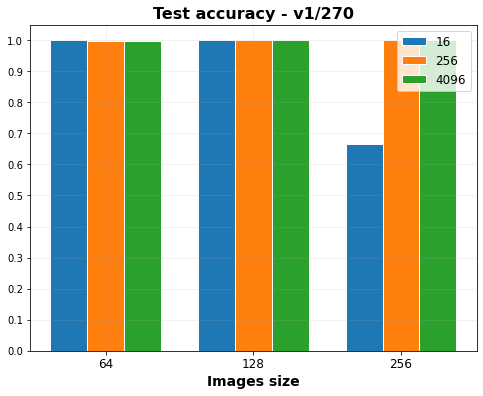

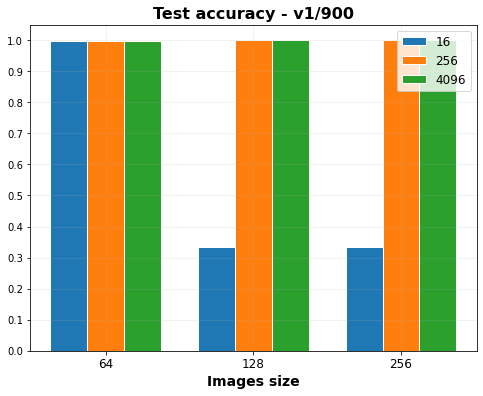

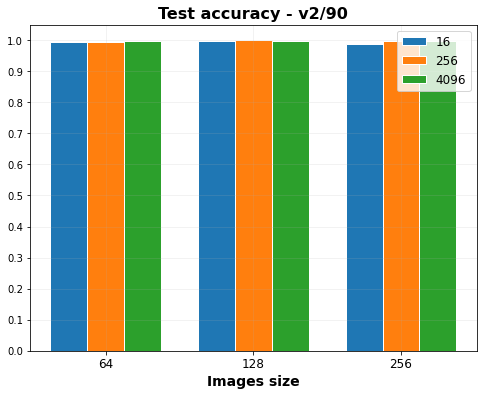

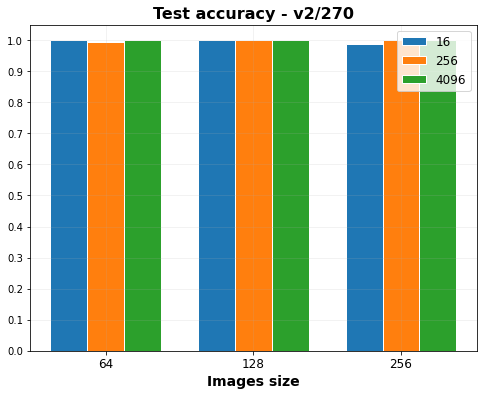

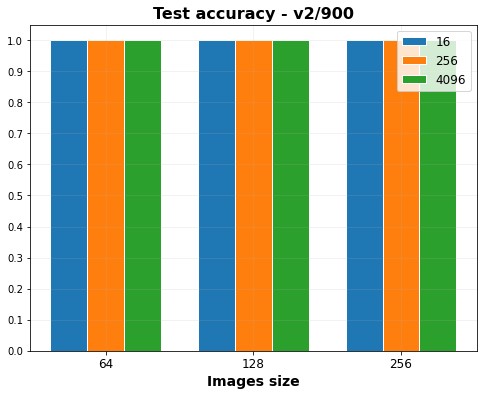

In [10]:
 for gt in results_df["generator_type"].unique():
    for img_per_class in results_df["images_per_class_num"].unique():
        sub_df = results_df[(results_df["generator_type"] == gt) & (results_df["images_per_class_num"] == img_per_class)]

        images_sizes = sub_df["images_size"].unique()
        fc =  sub_df["fc1"].unique()

        barWidth = 0.25

        plt.figure(figsize = (8, 6))
        plt.title(f"Test accuracy - {gt}/{img_per_class}", size = 16, fontweight = "bold")

        for i, a in enumerate(fc):
            bars = sub_df[sub_df["fc1"] == a]["test_sparse_categorical_accuracy"]
            r = [x + i * barWidth for x in np.arange(len(bars))]
            plt.grid(alpha = 0.2)
            plt.bar(r, bars, width = barWidth, edgecolor = "white", label = a)
            
        plt.xlabel("Images size", size = 14, fontweight = "bold")
        plt.xticks([r + barWidth for r in range(len(bars))], images_sizes, size = 12)
        plt.yticks(np.arange(0, 1.1, 0.1))
            
        plt.legend(fontsize = 12)

        # plt.savefig(path)

        plt.show()

---

### Best models

In [11]:
# Best models based on test accuracy, val accuracy (last epoch) and train accuracy (last epoch)
sort_cols = ["test_sparse_categorical_accuracy", "val_sparse_categorical_accuracy_last_epoch", "train_sparse_categorical_accuracy_last_epoch"]
results_df.loc[:, list(results_df.columns[0:6]) + sort_cols].sort_values(by = sort_cols, ascending = False).reset_index(drop = True)

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,test_sparse_categorical_accuracy,val_sparse_categorical_accuracy_last_epoch,train_sparse_categorical_accuracy_last_epoch
0,v1,90,128,32,16,16,1.000000,1.000000,1.000000
1,v1,90,256,32,4096,4096,1.000000,1.000000,1.000000
2,v1,270,64,32,16,16,1.000000,1.000000,1.000000
3,v1,270,128,32,16,16,1.000000,1.000000,1.000000
4,v1,270,128,32,256,256,1.000000,1.000000,1.000000
5,v1,270,128,32,4096,4096,1.000000,1.000000,1.000000
6,v1,270,256,32,256,256,1.000000,1.000000,1.000000
7,v1,270,256,32,4096,4096,1.000000,1.000000,1.000000
8,v1,900,128,32,256,256,1.000000,1.000000,1.000000
9,v1,900,128,32,4096,4096,1.000000,1.000000,1.000000


In [12]:
# Best models based on test accuracy, val accuracy (last epoch) and train accuracy (last epoch)
sort_cols = ["test_sparse_categorical_accuracy", "val_sparse_categorical_accuracy_last_epoch", "train_sparse_categorical_accuracy_last_epoch"]
results_df.loc[:, [col for col in results_df.columns if not (col.startswith("true") or "loss" in col or "time" in col)]].sort_values(by = sort_cols, ascending = False).reset_index(drop = True)

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,train_sparse_categorical_accuracy_last_epoch,train_sparse_categorical_accuracy_avg5,train_sparse_categorical_accuracy_avg10,val_sparse_categorical_accuracy_last_epoch,val_sparse_categorical_accuracy_avg5,val_sparse_categorical_accuracy_avg10,test_sparse_categorical_accuracy
0,v1,90,128,32,16,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,v1,90,256,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,v1,270,64,32,16,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,v1,270,128,32,16,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,v1,270,128,32,256,256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,v1,270,128,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,v1,270,256,32,256,256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,v1,270,256,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,v1,900,128,32,256,256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,v1,900,128,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

### Confusion matrices analysis

In [13]:
conf_matrix_series = results_df.loc[:, [col for col in results_df.columns if col.startswith("true")]].sum()
conf_matrix_series

true_3_pred_3    4674
true_3_pred_5       5
true_3_pred_7     181
true_5_pred_3       3
true_5_pred_5    4583
true_5_pred_7     274
true_7_pred_3       0
true_7_pred_5     109
true_7_pred_7    4751
dtype: int64

In [14]:
def prepare_labels(prefix):
    return [f"{prefix}_{x}" for x in [3, 5, 7]]

In [15]:
conf_matrix_vals = np.array(conf_matrix_series)
conf_matrix = conf_matrix_vals.reshape([3, 3])
conf_matrix_df = pd.DataFrame(conf_matrix, index = prepare_labels("true"), columns = prepare_labels("pred"))
conf_matrix_df

,pred_3,pred_5,pred_7
true_3,4674,5,181
true_5,3,4583,274
true_7,0,109,4751


In [16]:
## Percentage

# 54 - number of trained ConvNets
# 90 - number of images in each class in test data

conf_matrix_perc_df = conf_matrix_df / (54 * 90)
conf_matrix_perc_df

,pred_3,pred_5,pred_7
true_3,0.961728,0.001029,0.037243
true_5,0.000617,0.943004,0.056379
true_7,0.000000,0.022428,0.977572


In [17]:
sort_cols = ["true_7_pred_5", "true_5_pred_7", "true_3_pred_7"]
results_df.loc[:, list(results_df.columns[0:6]) + sort_cols].sort_values(by = sort_cols, ascending = False).reset_index(drop = True)

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,true_7_pred_5,true_5_pred_7,true_3_pred_7
0,v1,270,256,32,16,16,90,0,0
1,v2,270,256,32,16,16,2,1,0
2,v1,90,64,32,16,16,2,0,0
3,v1,90,64,32,256,256,2,0,0
4,v1,90,64,32,4096,4096,2,0,0
5,v1,90,128,32,4096,4096,2,0,0
6,v2,90,64,32,16,16,1,0,1
7,v1,90,128,32,256,256,1,0,0
8,v1,90,256,32,256,256,1,0,0
9,v1,270,64,32,256,256,1,0,0


In [18]:
# Filter out weird cases
results_sub_df = results_df[~((results_df["true_7_pred_5"] == 90) | (results_df["true_5_pred_7"] == 90) | (results_df["true_3_pred_7"] == 90))].copy()
conf_matrix_series2 = results_sub_df.loc[:, [col for col in results_sub_df.columns if col.startswith("true")]].sum()
conf_matrix_vals2 = np.array(conf_matrix_series2)
conf_matrix2 = conf_matrix_vals2.reshape([3, 3])
conf_matrix_df2 = pd.DataFrame(conf_matrix2, index = prepare_labels("true"), columns = prepare_labels("pred"))
conf_matrix_df2

,pred_3,pred_5,pred_7
true_3,4494,5,1
true_5,3,4493,4
true_7,0,19,4481
